In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#2.Load the dataset
data=pd.read_csv("/content/drive/MyDrive/IBM (1)/Churn_Modelling.csv")

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


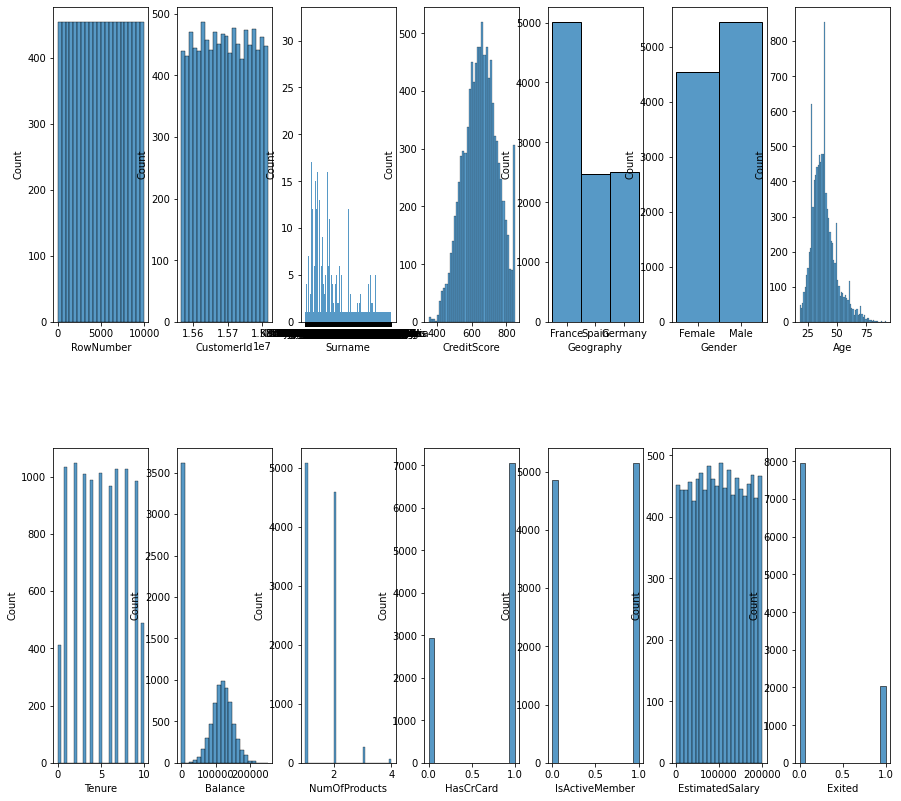

In [31]:
#3.Visualizations
#3.1 Univariate Analysis
fig, ax = plt.subplots(2, 7, figsize=(15, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=0.4)
for variable, subplot in zip(data.columns, ax.flatten()):
  sns.histplot(data[variable], ax=subplot)

In [ ]:
#3.2 Bi - Variate Analysis
sns.pairplot(data = data)
plt.show()

In [ ]:
#3.3 Multi - Variate Analysis
result = pd.pivot_table(data=data, index='CreditScore')
sns.heatmap(result, annot=True, cmap = 'RdYlGn_r')
plt.show()

In [ ]:
#4.Descriptive statistics
data.describe()

In [ ]:
#5.Handling missing value
data.isnull().sum()

In [ ]:
data['Geography'].value_counts()

In [ ]:
#6.Outliers and replace the outliers
sns.boxplot(data['EstimatedSalary'])

In [ ]:
qnt = data.quantile( q=[0.25, 0.75])
qnt

In [ ]:
IQR=qnt.loc[0.75]-qnt.loc[0.25]
IQR

In [ ]:
upper_extreme=qnt.loc[0.75]+1.5*IQR
upper_extreme

In [ ]:
lower_extreme=qnt.loc[0.25]-1.5*IQR
lower_extreme

In [ ]:
data[data["EstimatedSalary"]>2.969675e+05]

In [ ]:
data[data["EstimatedSalary"]<-9.657710e+04]

In [ ]:
#7.Categorical columns and perform encoding.
pd.get_dummies(data,columns=["Geography"])

In [ ]:
from sklearn.preprocessing import LabelEncoder
laben=LabelEncoder()
data["Geography"]=laben.fit_transform(data["Geography"])
data.head()

In [ ]:
#8.Split the data into dependent and independent variables.
y=data["EstimatedSalary"]
x=data.iloc[:,0:14]

In [ ]:
#9.Scale the independent variables.
data.iloc[:,0:14]

In [ ]:
#10.Split the data into training and testing.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape

In [ ]:
x_test.shape